Reading files...
Reading pincchoff_sum_0x25G0.xltx: Sheet has 13 rows and 3 columns
✓ Found 7 data points in pincchoff_sum_0x25G0.xltx: ['75B-SA1_Gpl', '75B-SA2-Gx', '75B-SA2-Gpl', '75B-SA2-Gn', '75C-A-Gn', '75C-A-Gx', '75C-B-Gn']
Reading pincchoff_sum_0x64G0.xlsx: Sheet has 11 rows and 3 columns
✓ Found 7 data points in pincchoff_sum_0x64G0.xlsx: ['75B-SA1_Gpl', '75B-SA2-Gx', '75B-SA2-Gpl', '75B-SA2-Gn', '75C-A-Gn', '75C-A-Gx', '75C-B-Gn']


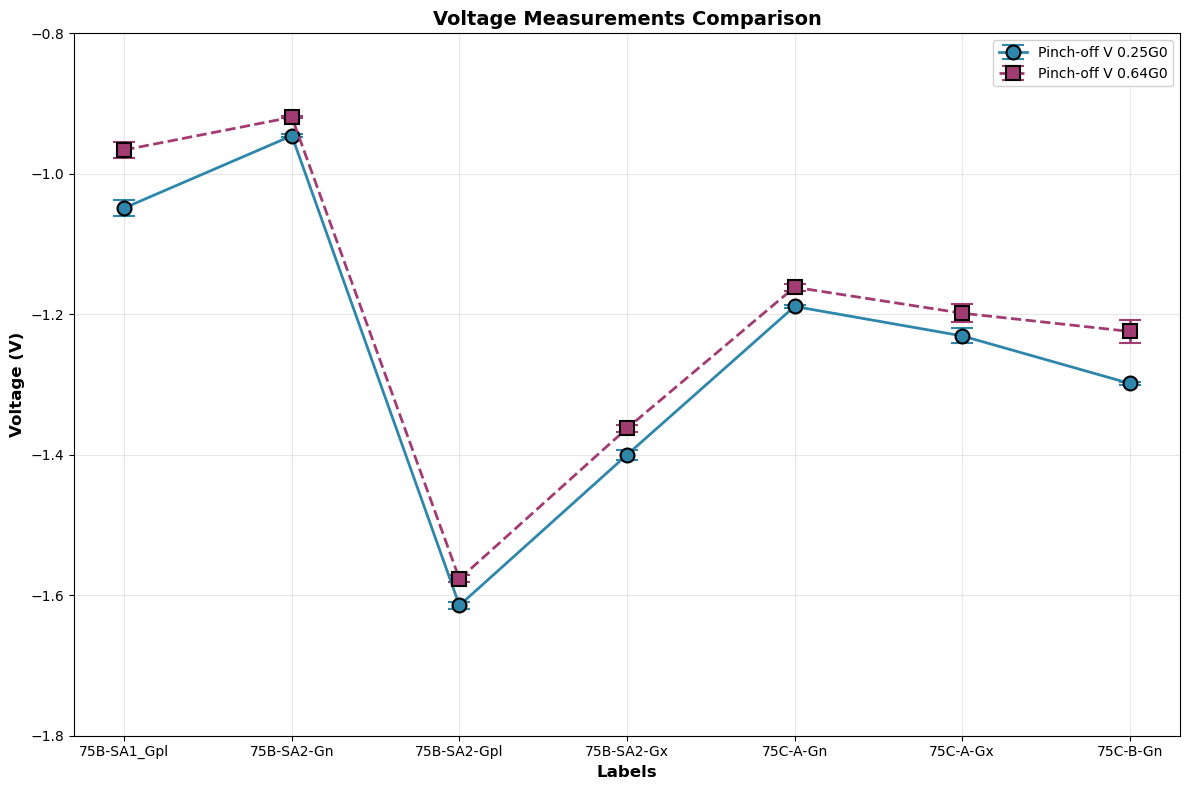


DATA SUMMARY

Pinch-off V 0.25G0 (pincchoff_sum_0x25G0.xltx):
----------------------------------------
Label 75B-SA1_Gpl: -1.048664 ± 0.011492 V
Label 75B-SA2-Gx: -1.400175 ± 0.006923 V
Label 75B-SA2-Gpl: -1.614650 ± 0.004554 V
Label 75B-SA2-Gn: -0.945811 ± 0.001819 V
Label 75C-A-Gn: -1.188888 ± 0.001599 V
Label 75C-A-Gx: -1.230842 ± 0.010699 V
Label 75C-B-Gn: -1.298545 ± 0.002262 V

Pinch-off V 0.64G0 (pincchoff_sum_0x64G0.xlsx):
----------------------------------------
Label 75B-SA1_Gpl: -0.966022 ± 0.011324 V
Label 75B-SA2-Gx: -1.362444 ± 0.004914 V
Label 75B-SA2-Gpl: -1.576948 ± 0.005031 V
Label 75B-SA2-Gn: -0.919426 ± 0.001721 V
Label 75C-A-Gn: -1.161530 ± 0.005261 V
Label 75C-A-Gx: -1.198516 ± 0.012934 V
Label 75C-B-Gn: -1.224475 ± 0.016365 V

Figures saved as 'voltage_comparison_plot.png' and 'voltage_comparison_plot.pdf'


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import re
import openpyxl

# --- Configuration ---
# Set the desired Y-axis range. Use None for automatic scaling.
y_axis_min = -1.8
y_axis_max = -0.8

def read_rtf_data(filename):
    """Read data from an RTF file and return labels, mean values, and standard deviations."""
    labels, mean_values, std_deviations = [], [], []
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            content = file.read()
            # Clean the content to extract data
            cleaned_content = re.sub(r'\\\\[a-zA-Z0-9]+', '', content)
            cleaned_content = re.sub(r'[{}]', '', cleaned_content)
            pattern = r'([A-Z])\\s+([\\d.]+)\\s+([\\d.]+)'
            matches = re.findall(pattern, cleaned_content)
            
            for match in matches:
                labels.append(match[0])
                mean_values.append(float(match[1]))
                std_deviations.append(float(match[2]))
            
            print(f"✓ Found {len(labels)} data points in {filename}: {labels}")
            
    except FileNotFoundError:
        print(f"✗ File not found: {filename}")
        return [], [], []
    except Exception as e:
        print(f"✗ Error reading RTF file {filename}: {e}")
        return [], [], []
    
    return labels, mean_values, std_deviations

def read_excel_data(filename):
    """Read data from an Excel file (.xlsx or .xltx) and return labels, mean values, and standard deviations."""
    labels, mean_values, std_deviations = [], [], []
    try:
        workbook = openpyxl.load_workbook(filename, data_only=True)
        sheet = workbook.active
        
        # Print sheet info for debugging
        print(f"Reading {filename}: Sheet has {sheet.max_row} rows and {sheet.max_column} columns")
        
        # Try to find data starting from different rows
        data_found = False
        for start_row in [1, 2, 3]:  # Try different starting rows
            labels_temp, mean_values_temp, std_deviations_temp = [], [], []
            
            for row_num, row in enumerate(sheet.iter_rows(min_row=start_row, values_only=True), start=start_row):
                if row[0] is None:  # Skip empty rows
                    continue
                    
                # Try to extract data from the row
                try:
                    if len(row) >= 3 and row[0] is not None and row[1] is not None and row[2] is not None:
                        # Check if it looks like data (not header)
                        label_val = str(row[0]).strip()
                        mean_val = float(row[1])
                        std_val = float(row[2])
                        
                        labels_temp.append(label_val)
                        mean_values_temp.append(mean_val)
                        std_deviations_temp.append(std_val)
                        data_found = True
                        
                except (ValueError, TypeError):
                    # This might be a header row or invalid data
                    continue
            
            if data_found and len(labels_temp) > 0:
                labels, mean_values, std_deviations = labels_temp, mean_values_temp, std_deviations_temp
                break
        
        if data_found:
            print(f"✓ Found {len(labels)} data points in {filename}: {labels}")
        else:
            print(f"✗ No valid data found in {filename}")
            # Print first few rows for debugging
            print("First few rows:")
            for i, row in enumerate(sheet.iter_rows(max_row=5, values_only=True)):
                print(f"  Row {i+1}: {row}")

    except FileNotFoundError:
        print(f"✗ File not found: {filename}")
        return [], [], []
    except Exception as e:
        print(f"✗ Error reading Excel file {filename}: {e}")
        return [], [], []
        
    return labels, mean_values, std_deviations

# List of files to process (updated to include your xlsx file)
filenames = [
    'pincchoff_sum_0x25G0.xltx',
    'pincchoff_sum_0x64G0.xlsx',
    #'pinchoffV_0.05A_txt.xltx',
    #'pincchoff_sum_0x25G08.xlsx' # Added your new xlsx file
]

# Custom labels for the legend (updated to include the new file)
file_labels = [
    'Pinch-off V 0.25G0',
    'Pinch-off V 0.64G0',
    #'Pinch-off V 0.05A',
      # Label for the new file # Label for the new file
]

# Styling for the plot
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A994E']
markers = ['o', 's', '^', 'D', 'v']
linestyles = ['-', '--', '-.', ':', '-']

# --- Main Script ---
plt.figure(figsize=(12, 8))
all_labels = set()
file_data = []

print("Reading files...")
for i, filename in enumerate(filenames):
    if filename.endswith('.rtf'):
        labels, mean_values, std_deviations = read_rtf_data(filename)
    elif filename.endswith(('.xltx', '.xlsx')):  # Updated to handle both .xltx and .xlsx
        labels, mean_values, std_deviations = read_excel_data(filename)
    else:
        print(f"✗ Unsupported file type: {filename}")
        continue

    if labels:
        file_data.append({
            'filename': filename,
            'labels': labels,
            'mean_values': mean_values,
            'std_deviations': std_deviations,
            'file_label': file_labels[i] if i < len(file_labels) else f'File {i+1}'
        })
        all_labels.update(labels)

# Prepare plot axes
sorted_labels = sorted(list(all_labels))
x_positions = {label: i for i, label in enumerate(sorted_labels)}

# Plot data from each successfully read file
for i, data in enumerate(file_data):
    # Create arrays for this file's data, filling with NaN for missing labels
    x_pos = []
    y_values = []
    y_errors = []
    
    for label in sorted_labels:
        if label in data['labels']:
            # Find the index of this label in the file's data
            label_index = data['labels'].index(label)
            x_pos.append(x_positions[label])
            y_values.append(data['mean_values'][label_index])
            y_errors.append(data['std_deviations'][label_index])
        else:
            print(f"🛈 Note: Label '{label}' not found in {data['filename']}.")
            # Don't add points for missing labels - this will create gaps in the line
    
    # Only plot if we have data points
    if x_pos:
        plt.errorbar(x_pos, y_values, yerr=y_errors, 
                     marker=markers[i % len(markers)], 
                     markersize=10, 
                     capsize=8, 
                     capthick=2,
                     linewidth=2, 
                     linestyle=linestyles[i % len(linestyles)], 
                     color=colors[i % len(colors)], 
                     markerfacecolor=colors[i % len(colors)], 
                     markeredgecolor='black', 
                     markeredgewidth=1.5,
                     ecolor=colors[i % len(colors)], 
                     elinewidth=2,
                     label=data['file_label'])

# Customize the plot
plt.xlabel('Labels', fontsize=12, fontweight='bold')
plt.ylabel('Voltage (V)', fontsize=12, fontweight='bold')
plt.title('Voltage Measurements Comparison', fontsize=14, fontweight='bold')
plt.xticks(range(len(sorted_labels)), sorted_labels)
plt.grid(True, alpha=0.3)

# Set custom y-axis range if specified
if y_axis_min is not None and y_axis_max is not None:
    plt.ylim(y_axis_min, y_axis_max)

if file_data:
    plt.legend(loc='best', framealpha=0.9)
else:
    plt.text(0.5, 0.5, 'No data files found or readable', 
             transform=plt.gca().transAxes, ha='center', va='center',
             fontsize=14, bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

plt.tight_layout()

# Save and display the figure
plt.savefig('voltage_comparison_plot.png', dpi=300, bbox_inches='tight')
plt.savefig('voltage_comparison_plot.pdf', bbox_inches='tight')
plt.show()

# Print data summary
print("\n" + "="*50)
print("DATA SUMMARY")
print("="*50)

if file_data:
    for data in file_data:
        print(f"\n{data['file_label']} ({data['filename']}):")
        print("-" * 40)
        for label, mean, std in zip(data['labels'], data['mean_values'], data['std_deviations']):
            print(f"Label {label}: {mean:.6f} ± {std:.6f} V")
    
    print(f"\nFigures saved as 'voltage_comparison_plot.png' and 'voltage_comparison_plot.pdf'")
else:
    print("\nNo data was successfully read from any files.")